In [129]:
import pandas as pd
import numpy as np
from scipy.stats import pointbiserialr, pearsonr

# def split_data(df: pd.DataFrame,
#                test_ratio: float,
#                seed: int) -> tuple[pd.DataFrame]:
#     """Diviser le dataset en set de train et test en mélangeant l'ordre des
#     données aléatoirement en fixant la random seed.

#     Args:
#         df (pd.DataFrame): _description_
#         test_ratio (float): _description_
#         seed (int): _description_

#     Returns:
#         tuple[pd.DataFrame]: X_train, y_train, X_test, y_test
#     """
#     pass

# Features 

* Price: The price of the house.

* Area: The total area of the house in square feet.

* Bedrooms: The number of bedrooms in the house.

* Bathrooms: The number of bathrooms in the house.

* Stories: The number of stories in the house.

* Mainroad: Whether the house is connected to the main road (Yes/No).

* Guestroom: Whether the house has a guest room (Yes/No).

* Basement: Whether the house has a basement (Yes/No).

* Hot water heating: Whether the house has a hot water heating system (Yes/No).

* Airconditioning: Whether the house has an air conditioning system (Yes/No).

* Parking: The number of parking spaces available within the house.

* Prefarea: Whether the house is located in a preferred area (Yes/No).

* Furnishing status: The furnishing status of the house (Fully Furnished, Semi-Furnished, Unfurnished).

* House Age: the house age

# 1 Exploration des données (EDA)

## 1.1 Importation des données

In [4]:
df = pd.read_csv('C:/Users/BIBER/Desktop/adama_project/projet-ds/data/house_prices.csv')
df.head()

,price,AreA,bedrooms,BATHROOMS,stories,mainroad,guestroom,basement,hotwaterheating,air conditioning,parking,prefarea,furnishing STATUS,houSeaGe
0,4543000.0,4990.0,4.0,2.0,2.0,yes,yes,yes,no,no,0.0,yes,furnished,15.0
1,8080940.0,7000.0,3.0,2.0,4.0,yes,no,no,no,yes,2.0,no,FURNISHED,11.0
2,8750000.0,4321.0,3.0,2.0,2.0,yes,no,yes,yes,no,2.0,no,FURNISHED,NaN
3,1890000.0,1700.0,3.0,1.0,2.0,yes,no,no,no,no,0.0,no,unfurnished,NaN
4,12215000.0,7500.0,4.0,2.0,2.0,yes,no,yes,no,yes,3.0,yes,furnished,NaN


## 1.2 Nettoyage des données

### 1.2.1 Formatage des données

In [5]:
def formatage_donnee(data):
    """
    Description
    Cette fonction change le nommage des colonnes (minuscule,
    sans espace, lié avec underscore). Rendre unique des valeurs écrites différemment.
    
    Parameters
    ----------
    data: A DataFrame
    Returns: 
    ----------
    A cleaned DataFrame
    """
    # Writing the columns names in lowercase, and replacing any space in the names with _
    data = data.rename(columns=lambda x: x.lower().replace(' ', '_'))
    
    # Making unique values that have been written diffrentely 
    for col in data.columns:
        if data[col].dtype == 'object':
            data[col] = data[col].str.lower()
    
            
    return data                

In [6]:
df = formatage_donnee(df)
df
.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,air_conditioning,parking,prefarea,furnishing_status,houseage
0,4543000.0,4990.0,4.0,2.0,2.0,yes,yes,yes,no,no,0.0,yes,furnished,15.0
1,8080940.0,7000.0,3.0,2.0,4.0,yes,no,no,no,yes,2.0,no,furnished,11.0
2,8750000.0,4321.0,3.0,2.0,2.0,yes,no,yes,yes,no,2.0,no,furnished,NaN
3,1890000.0,1700.0,3.0,1.0,2.0,yes,no,no,no,no,0.0,no,unfurnished,NaN
4,12215000.0,7500.0,4.0,2.0,2.0,yes,no,yes,no,yes,3.0,yes,furnished,NaN


### 1.2.2 Valeurs manquantes


In [42]:
# Since missing values depend on the data we have to chekc how many data are missing in each columns, then decide.
df.isnull().sum(axis = 0)    

price                 20
area                  15
bedrooms              24
bathrooms             21
stories               15
mainroad              16
guestroom             23
basement              22
hotwaterheating       18
air_conditioning      15
parking               16
prefarea              14
furnishing_status     23
houseage             804
dtype: int64

In [7]:
# We notice that houseage column has 804 missing value out of 806, so we remove this column
df = df.drop('houseage', axis=1)

In [50]:
# For the missing values, we can replace the missing values with the most frequent value in each column for example, or 
# take the mean for float colums, or be pessimistic and put the worst possible value!
"""
for col in df.columns:
    if df[col].dtype == 'object' and (col != 'furnishing_status'):
        df[col] = df[col].fillna('no')
    elif df[col].dtype == 'float':
        df[col] = df[col].fillna(df[col].min())
    else:
        df0[col] = df0[col].fillna('unfurnished')
        """"
        

In [8]:
df.isnull().sum(axis = 0)  

price                20
area                 15
bedrooms             24
bathrooms            21
stories              15
mainroad             16
guestroom            23
basement             22
hotwaterheating      18
air_conditioning     15
parking              16
prefarea             14
furnishing_status    23
dtype: int64

## 1.3 Visualisation des données

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,air_conditioning,parking,prefarea,furnishing_status
0,4543000.0,4990.0,4.0,2.0,2.0,yes,yes,yes,no,no,0.0,yes,furnished
1,8080940.0,7000.0,3.0,2.0,4.0,yes,no,no,no,yes,2.0,no,furnished
2,8750000.0,4321.0,3.0,2.0,2.0,yes,no,yes,yes,no,2.0,no,furnished
3,1890000.0,1700.0,3.0,1.0,2.0,yes,no,no,no,no,0.0,no,unfurnished
4,12215000.0,7500.0,4.0,2.0,2.0,yes,no,yes,no,yes,3.0,yes,furnished


In [19]:

df.select_dtypes("float").columns


Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking'], dtype='object')

### 1.3.1 Etude univariée

c:\Users\BIBER\Anaconda\envs\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\BIBER\Anaconda\envs\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\BIBER\Anaconda\envs\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\BIBER\Anaconda\envs\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

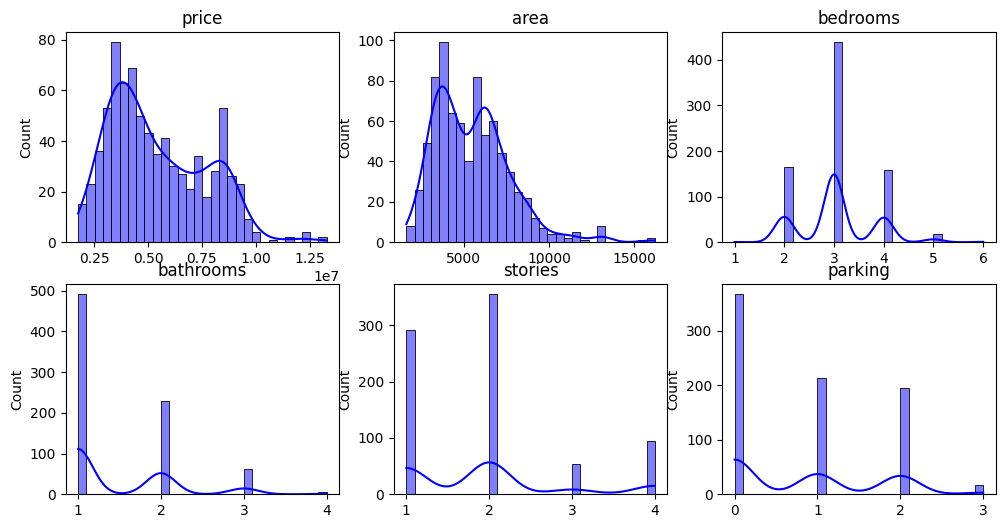

In [35]:
def etude_univarie_quanti(data):
    colonne_quanti = data.select_dtypes("float").columns
    
    fig, axs = plt.subplots(2, 3, figsize=(12, 6))
    
    i = 0
    j = 0
    for col in colonne_quanti:
        sns.histplot(data[col].to_numpy(), kde=True,ax = axs[i,j], color='blue', bins=30)
        axs[i,j].set_title(col)

        j += 1
        if j >= 3:
            j = 0
            i += 1
            
etude_univarie_quanti(df)
        
   
   

In [113]:
# Créez une figure avec plusieurs sous-graphiques
def etude_univarie(data):
    colonne_quanti = data.select_dtypes("float").columns
    colonne_quali = data.select_dtypes("object").columns
    
    fig, axes = plt.subplots(nrows=3, ncols=len(colonne_quanti), figsize=(15, 6))

    # Parcourez chaque colonne et affichez son histogramme
    for i, col in enumerate(colonne_quanti):
        sns.histplot(data[col].to_numpy(), kde=True, ax=axes[0,i-1], color ="blue",bins=30)#data[col].hist(ax=axes[0, i-1], bins=20)  # Vous pouvez ajuster le nombre de bacs (bins) selon vos besoins
        axes[0, i - 1].set_xlabel(col)
        axes[0, i - 1].set_ylabel('Fréquence')
    
    for i, col in enumerate(colonne_quali):
        counts = data[col].value_counts()
        if i >= 6:
            axes[1, i-1].pie(counts, labels=counts.index, autopct='%1.1f%%')
            axes[1, i-1].set_xlabel(col)
            axes[1, i-1].set_ylabel('')
        else:
            axes[2, i-1].pie(counts, labels=counts.index, autopct='%1.1f%%')
            axes[2, i-1].set_xlabel(col)
            axes[2, i-1].set_ylabel('')

    # Ajustez la mise en page pour éviter les chevauchements d'étiquettes
    plt.tight_layout()
    # Affichez la figure
    plt.show()

In [126]:
def etude_univarie(data):
    colonne_quanti = data.select_dtypes("float").columns
    colonne_quali = data.select_dtypes("object").columns
    
    fig, axes = plt.subplots(nrows=3, ncols=len(colonne_quanti), figsize=(15, 8))

    # Parcourez chaque colonne quantitative et affichez son histogramme
    for i, col in enumerate(colonne_quanti):
        sns.histplot(data[col].to_numpy(), kde=True, ax=axes[0, i], color="blue", bins=30)
        axes[0, i].set_xlabel(col)
        axes[0, i].set_ylabel('Fréquence')
    
    # Parcourez chaque colonne qualitative et affichez un diagramme en secteurs (pie chart)
    for i, col in enumerate(colonne_quali):
        counts = data[col].value_counts()
        if i < len(colonne_quali) and i < 6:
            row = 1
        else:
            row = 2
            i -= 6  # Réduisez l'indice pour accéder correctement aux colonnes qualitatives dans la deuxième ligne
        axes[row, i].pie(counts, labels=counts.index, autopct='%1.1f%%')
        axes[row, i].set_xlabel(col)
        axes[row, i].set_ylabel('')
    for i in range(1,6):
        axes[2,i].axis('off')    

    # Ajustez la mise en page pour éviter les chevauchements d'étiquettes
    plt.tight_layout()
    # Affichez la figure
    plt.show()

c:\Users\BIBER\Anaconda\envs\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\BIBER\Anaconda\envs\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\BIBER\Anaconda\envs\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\BIBER\Anaconda\envs\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

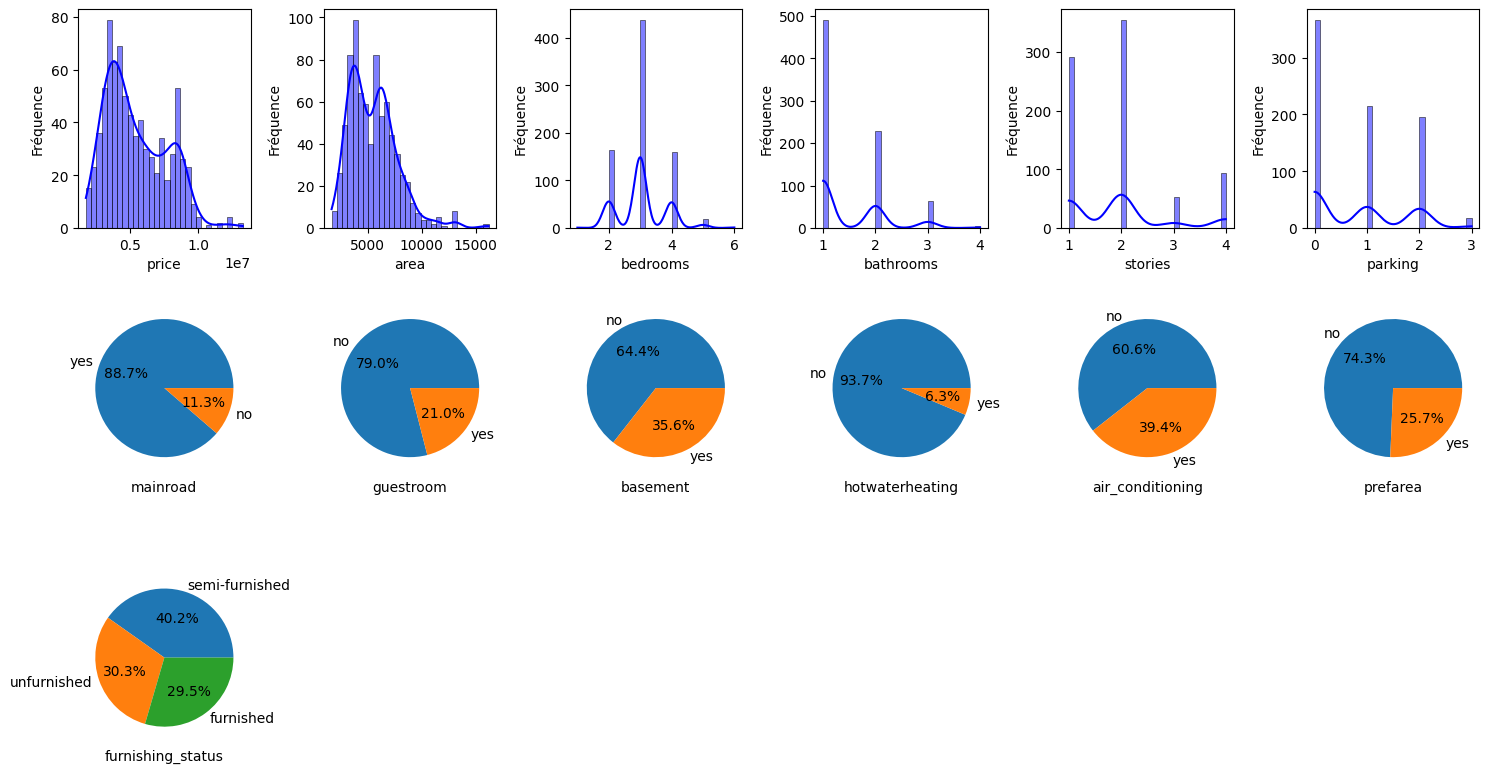

In [127]:
#  Categorical variables
etude_univarie(df)

In [92]:
df['mainroad'].value_counts().index
print(df.dtypes)
display(df)
    

price                float64
area                 float64
bedrooms             float64
bathrooms            float64
stories              float64
mainroad              object
guestroom             object
basement              object
hotwaterheating       object
air_conditioning      object
parking              float64
prefarea              object
furnishing_status     object
dtype: object


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,air_conditioning,parking,prefarea,furnishing_status
0,4543000.0,4990.0,4.0,2.0,2.0,yes,yes,yes,no,no,0.0,yes,furnished
1,8080940.0,7000.0,3.0,2.0,4.0,yes,no,no,no,yes,2.0,no,furnished
2,8750000.0,4321.0,3.0,2.0,2.0,yes,no,yes,yes,no,2.0,no,furnished
3,1890000.0,1700.0,3.0,1.0,2.0,yes,no,no,no,no,0.0,no,unfurnished
4,12215000.0,7500.0,4.0,2.0,2.0,yes,no,yes,no,yes,3.0,yes,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
804,2653000.0,4000.0,3.0,1.0,2.0,yes,no,no,no,yes,0.0,no,unfurnished
805,8855000.0,6421.0,3.0,3.0,2.0,yes,no,no,no,yes,1.0,yes,semi-furnished
806,3010000.0,3750.0,3.0,1.0,2.0,yes,no,no,no,no,0.0,no,unfurnished
807,4340000.0,1905.0,5.0,1.0,2.0,no,no,yes,no,no,0.0,no,semi-furnished


### 1.3.2 Etude multivariée

In [130]:
# Sélectionner les colonnes numériques
numeric_columns = df.select_dtypes(include=['float64'])

# Calculer la matrice de corrélation pour les variables quantitatives
correlation_matrix = numeric_columns.corr()

# Calculer les corrélations pour les variables catégorielles
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].astype('category').cat.codes  # Convertir en valeurs numériques pour la corrélation
    corr_with_cat = df.apply(lambda x: pointbiserialr(x, df[col]))
    correlation_matrix[col] = corr_with_cat[0]

# Afficher la matrice de corrélation
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de Corrélation')
plt.show()

ValueError: array must not contain infs or NaNs

### 1.4 Typage des variables

In [ ]:
def typage_variable(data):
    """
    ...
    """
    # On cree un variable qui contient le nom des colonnes de type object
    object_columns = data.select_dtypes(include=['object']).columns
    
    # On change les valeurs 'yes' et 'no' dans notre data à 1 et 0 respectivement,
    for col in object_columns:
        data[col] = data[col].replace({'yes' : 1, 'no' : 0, 'semi-furnished' : 'semi_furnished' })
    
    # On fait one hot encoding the the variable furnishing_status
    data = pd.get_dummies(data, columns=['furnishing_status'])
    
    return data

# 2 Validation croisée

# 3 Machine learning

## 3.1 Baseline

## 3.2 Modèle de régression linéaire

## 3.3 Modèle ensembliste

## 3.4 Features importances

# 4 Bonus